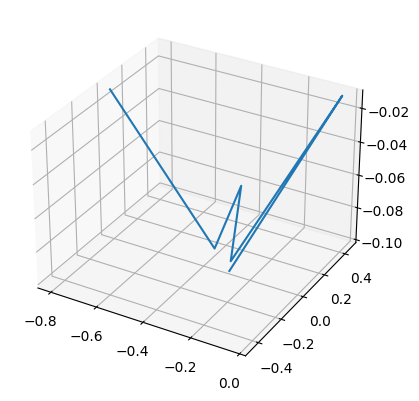

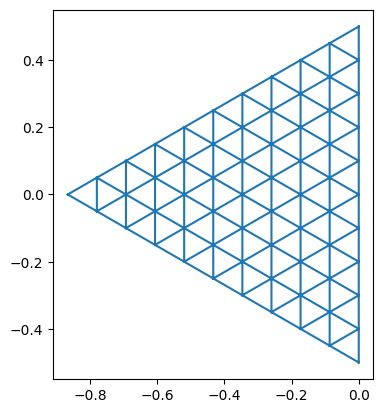

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Initialize parameters
n = 10
L = 1  # side length of triangle
c = np.array([-L / 2 / np.sqrt(3), 0])

# Rope 1
rope1_s = np.array([*c, -0.1])
rope1_e = np.array([0, L / 2, 0])
rope1_nodes = np.vstack([np.linspace(rope1_s[i], rope1_e[i], n) for i in range(3)]).T
n_nodes_r1 = rope1_nodes.shape[0] - 1
rope1_edges = np.array([np.arange(1, n_nodes_r1), np.arange(2, n_nodes_r1 + 1)]).T - 1

# Rope 2
rope2_s = rope1_s
rope2_e = np.array([0, -L / 2, 0])
rope2_nodes = np.vstack([np.linspace(rope2_s[i], rope2_e[i], n) for i in range(3)]).T
n_nodes_r2 = rope2_nodes.shape[0] - 2
rope2_edges = np.array([np.concatenate(([1], np.arange(n_nodes_r1 + 1, n_nodes_r1 + n_nodes_r2))),
                        np.concatenate(([n_nodes_r1 + 1], np.arange(n_nodes_r1 + 2, n_nodes_r1 + n_nodes_r2 + 1)))]).T - 1

# Rope 3
rope3_s = rope1_s
rope3_e = np.array([-L * np.sqrt(3) / 2, 0, 0])
rope3_nodes = np.vstack([np.linspace(rope3_s[i], rope3_e[i], n) for i in range(3)]).T
n_nodes_r3 = rope3_nodes.shape[0] - 2
a = np.arange(n_nodes_r1 + n_nodes_r2 + 1, n_nodes_r1 + n_nodes_r2 + n_nodes_r3)
b = np.arange(n_nodes_r1 + n_nodes_r2 + 2, n_nodes_r1 + n_nodes_r2 + n_nodes_r3 + 1)
rope3_edges = np.array([np.concatenate(([1], a)),
                        np.concatenate(([n_nodes_r1 + n_nodes_r2 + 1], b))]).T - 1

# Rod nodes and edges
rod_nodes = np.vstack([rope1_nodes[:-1, :], rope2_nodes[1:-1, :], rope3_nodes[1:-1, :]])
rod_edges = np.vstack([rope1_edges, rope2_edges, rope3_edges])

# Plot rod nodes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(rod_nodes[:, 0], rod_nodes[:, 1], rod_nodes[:, 2])
plt.show()

# Triangular shell
l = L / n
x = []
y = []

for i in range(n + 1):
    num_points = i + 1  # Only i + 1 points in each row
    y_temp = np.linspace(-i * l / 2, i * l / 2, num_points)  # generate points symmetrically
    y.extend(y_temp)

    x_temp = (np.sqrt(3) / 2) * (i - n) * l * np.ones(len(y_temp))  # equidistant x-coordinates
    x.extend(x_temp)

# Delaunay triangulation and plotting
DT = Delaunay(np.column_stack((x, y)))
plt.figure()
plt.triplot(np.array(x), np.array(y), DT.simplices)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Shell nodes
shell_nodes = np.column_stack((DT.points, np.zeros(DT.points.shape[0])))
face_nodes = DT.simplices + rod_nodes.shape[0]

# Rod-shell joint edges
rod_shell_joint_edges = []

# Joint 1: rod1 last node and corresponding shell node
ind1 = np.where(np.all(shell_nodes[:, :3] == [0, 0.5, 0], axis=1))[0]
rod_shell_joint_edges.append([n_nodes_r1-1, ind1[0] + rod_nodes.shape[0]])

# Joint 2: rod2 last node and corresponding shell node
ind2 = np.where(np.all(shell_nodes[:, :3] == [0, -0.5, 0], axis=1))[0]
rod_shell_joint_edges.append([n_nodes_r1 + n_nodes_r2-1, ind2[0] + rod_nodes.shape[0]])

# Joint 3: rod3 last node and shell node 1
rod_shell_joint_edges.append([n_nodes_r1 + n_nodes_r2 + n_nodes_r3-1,  rod_nodes.shape[0]])

rod_shell_joint_edges = np.array(rod_shell_joint_edges)

# Change to matlab based indexing
face_nodes = face_nodes + np.ones((len(face_nodes),3));
rod_edges = rod_edges + np.ones((len(rod_edges),2));
rod_shell_joint_edges = rod_shell_joint_edges + np.ones((len(rod_shell_joint_edges),2));

# Save data to a file
filename = 'triangle_parachute_n10_python.txt'

with open(filename, 'w') as f:
    f.write('*Nodes\n')
with open(filename, 'a') as f:
    np.savetxt(f, rod_nodes, fmt='%f', delimiter=', ', comments='', header='')

with open(filename, 'a') as f:
    np.savetxt(f, shell_nodes, fmt='%f', delimiter=', ', comments='', header='')

with open(filename, 'a') as f:
    f.write('*Triangles\n')
with open(filename, 'a') as f:
    np.savetxt(f, face_nodes, fmt='%d', delimiter=', ', comments='', header='')

with open(filename, 'a') as f:
    f.write('*Edges\n')
with open(filename, 'a') as f:
    np.savetxt(f, rod_edges, fmt='%d', delimiter=', ', comments='', header='')
with open(filename, 'a') as f:
    np.savetxt(f, rod_shell_joint_edges, fmt='%d', delimiter=', ', comments='', header='')
